In [1]:
import pandas as pd
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
type (mnist)

module

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
x_train[1].shape

(28, 28)

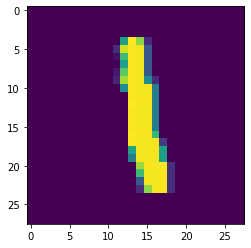

In [7]:
plt.imshow(x_train[6])

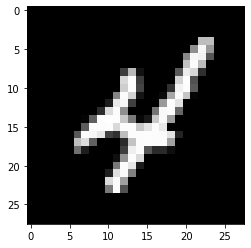

In [8]:
plt.imshow(x_train[9],cmap='gist_gray')

# Reshaping and Normalizing the images

In [9]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


# Building CNN

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [13]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1936 - accuracy: 0.9423
Epoch 2/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0780 - accuracy: 0.9761
Epoch 3/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0540 - accuracy: 0.9823
Epoch 4/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0423 - accuracy: 0.9859
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0343 - accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0284 - accuracy: 0.9906
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0259 - accuracy: 0.9913
Epoch 8/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0212 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0181 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 39s 21m

In [14]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0688 - accuracy: 0.9830


[0.06881140917539597, 0.9829999804496765]